In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
avacado = pd.read_csv("avacado.csv")
avacado.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Date,2015-12-27,2015-12-20,2015-12-13,2015-12-06,2015-11-29
AveragePrice,1.33,1.35,0.93,1.08,1.28
Total Volume,64236.6,54877,118220,78992.1,51039.6
4046,1036.74,674.28,794.7,1132,941.48
4225,54454.8,44638.8,109150,71976.4,43838.4
4770,48.16,58.33,130.5,72.58,75.78
Total Bags,8696.87,9505.56,8145.35,5811.16,6183.95
Small Bags,8603.62,9408.07,8042.21,5677.4,5986.26
Large Bags,93.25,97.49,103.14,133.76,197.69


Unnamed: 0 seems to be a identifier column and can to be removed as it will not helping in model building

# EDA

In [3]:
avacado.shape

(18249, 14)

There are 18249 rows and 14 columns

In [4]:
avacado.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

look like there are no constant or identifier column other than Unnamed: 0

In [5]:
avacado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Luckily there are no null values.

In [6]:
avacado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Dataset have 3 columns with object type data (***Date***,***type*** and ***region***), which we will have to encode.

In [7]:
avacado.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Data is higly skewed in almost all the columns.

In [8]:
avacado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All the columns have count equal to 18249. Mean and median have high difference except for Average price stating that data has high skewness present. There is high variance in all the columns except for Average price and year column. Difference between min, max and interquartile ranges is uneven hence looks like there are outliers present in the data.

In [9]:
avacado.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

## Univariate Analysis

In [10]:
#We separate categorical and continuous features
catagorical = ['year','region','type']
continues = ['Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [11]:
print(f"There are {len(avacado[catagorical].columns)} Categorical Attributes")
print(f"There are {len(avacado[continues].columns)} Numerical Attributes")

There are 3 Categorical Attributes
There are 8 Numerical Attributes


### Plotting Catagorical features of data

### Ploting *type* column 

conventional    9126
organic         9123
Name: type, dtype: int64

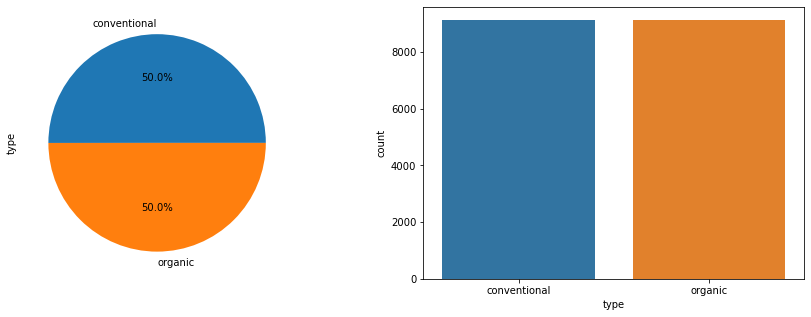

In [12]:
plt.figure(figsize=(15,5)) # size of the figure
plt.subplot(1,2,1) 
avacado['type'].value_counts().plot.pie(autopct='%1.1f%%') # plotting pie chart for "type" column in the dataset 
plt.subplot(1,2,2)
sns.countplot(avacado['type']) # plotting count plot for "type" column in the dataset
avacado['type'].value_counts()

There two types organic and conventional are almost equal and balanced.

### Ploting *year* column

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

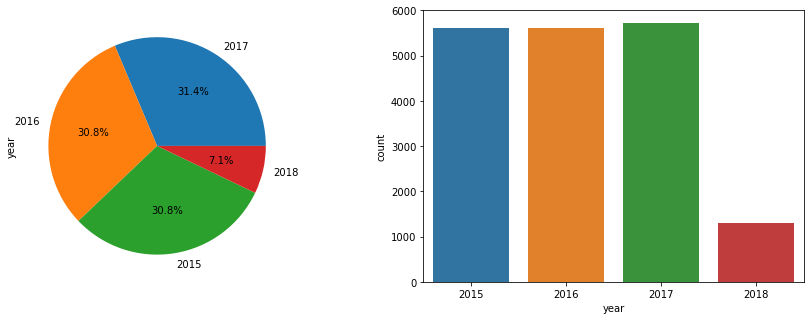

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
avacado['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(avacado['year'])
avacado['year'].value_counts()

Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

### Ploting *regions* column

Total number of regions 54


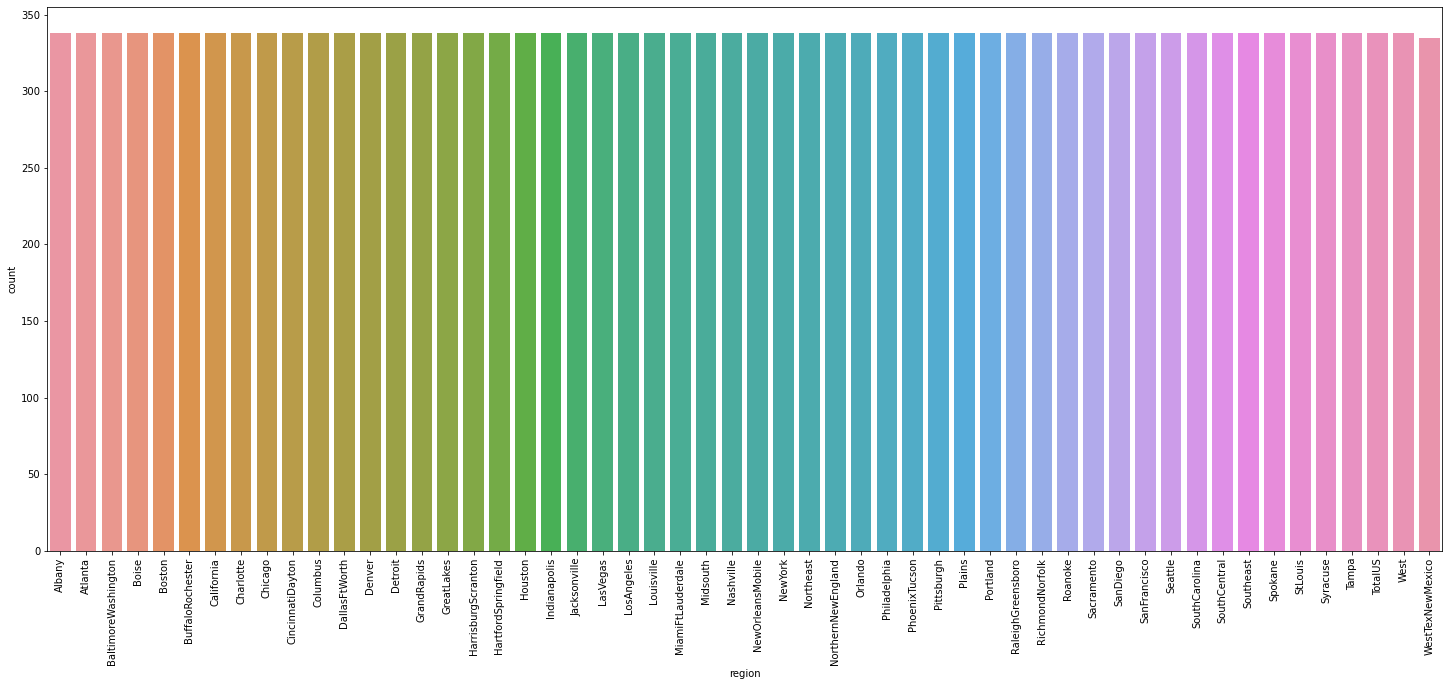

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(avacado['region'])
plt.xticks(rotation=90)
print('Total number of regions',avacado['region'].nunique())

There are 54 regions in total. All the region produces almost equal amounts of avocados except for **west tex new mexico** which has slightly less number.

### Plotting Continues features of data

Minimum 0.44
Maximum 3.25


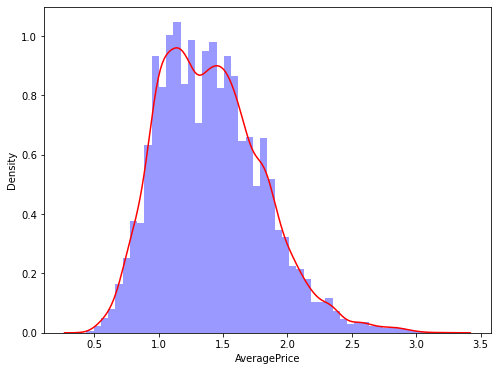

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['AveragePrice'],color='b', kde_kws={"color": "r"})

# printing min and max value for Average Price
print('Minimum',avacado['AveragePrice'].min())
print('Maximum',avacado['AveragePrice'].max())

little skewness is present in Average Price, and price ranging from 0.44 to 3.25

Minimum 84.56
Maximum 62505646.52


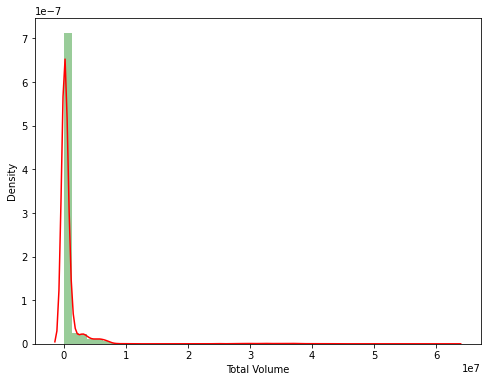

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['Total Volume'],color='g', kde_kws={"color": "r"})

print('Minimum',avacado['Total Volume'].min())
print('Maximum',avacado['Total Volume'].max())

Most of the Total volume of Avacados is concentrated below 1e7 volumes while it goes upto 62505646.52 volumes. Data has high skewness to the right, which we will take care ahead.

Minimum 0.0
Maximum 22743616.17


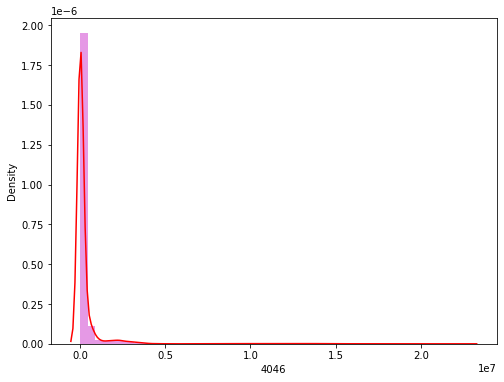

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['4046'],color='m', kde_kws={"color": "r"})

print('Minimum',avacado['4046'].min())
print('Maximum',avacado['4046'].max())


Product look up code 4046 is mostly concentrated near the minimum whereas the range goes up to 22743616.17. Data has high skewness to the right, which we will take care ahead.

Minimum 0.0
Maximum 2546439.11


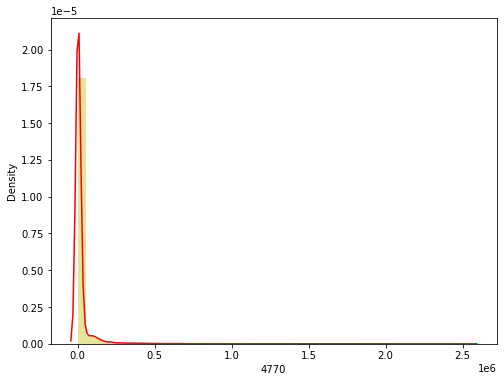

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['4770'],color='y', kde_kws={"color": "r"})

print('Minimum',avacado['4770'].min())
print('Maximum',avacado['4770'].max())

Product look up code 4770 is mostly concentrated near the minimum and the range equal goes from minimum 0 to 2546439.11 as the maximum.  Data has high skewness to the right, which we will take care ahead.



Minimum 0.0
Maximum 20470572.61


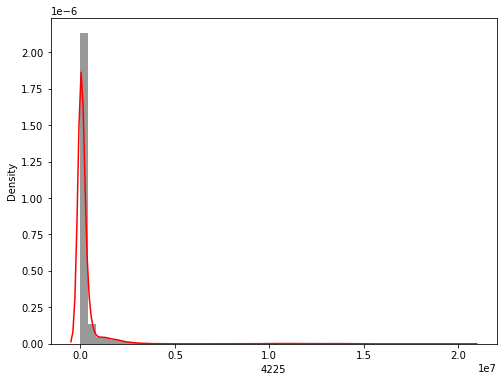

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['4225'],color='k', kde_kws={"color": "r"})

print('Minimum',avacado['4225'].min())
print('Maximum',avacado['4225'].max())

Product look up code 4225 is mostly concentrated near the minimum and the range goes from minimum 0 to 20470572.61 as the maximum. Data has high skewness to the right, which we will take care ahead.

Minimum 0.0
Maximum 19373134.37


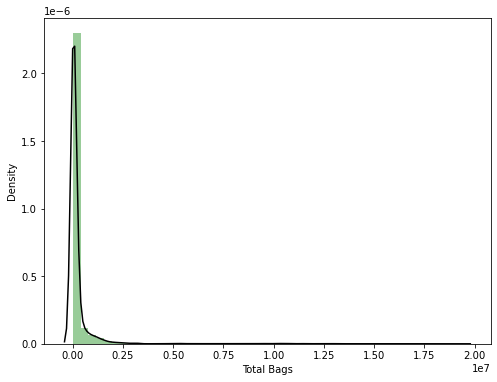

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['Total Bags'],color='g', kde_kws={"color": "k"})

print('Minimum',avacado['Total Bags'].min())
print('Maximum',avacado['Total Bags'].max())

Total bags has most of its density near to its minimum value and goes up to a range of 19373134.37 with its maximum value.  Data has high skewness to the right

Minimum 0.0
Maximum 13384586.8


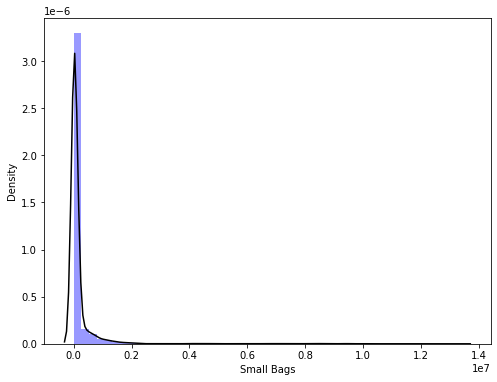

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['Small Bags'],color='b', kde_kws={"color": "k"})

print('Minimum',avacado['Small Bags'].min())
print('Maximum',avacado['Small Bags'].max())

Small bags has most of its density near to its minimum value which is 0 and goes up to a range of 13384586.8 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 5719096.61


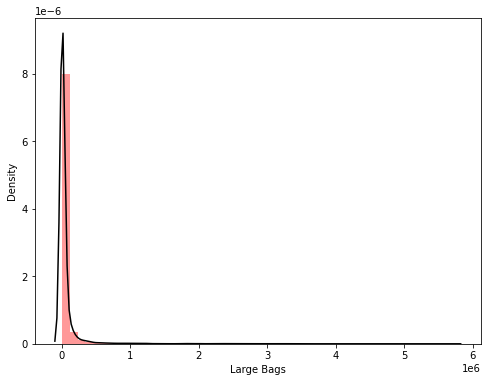

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['Large Bags'],color='r', kde_kws={"color": "k"})

print('Minimum',avacado['Large Bags'].min())
print('Maximum',avacado['Large Bags'].max())

Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 5719096.61 with its maximum value. Data has high skewness to the right

Minimum 0.0
Maximum 551693.65


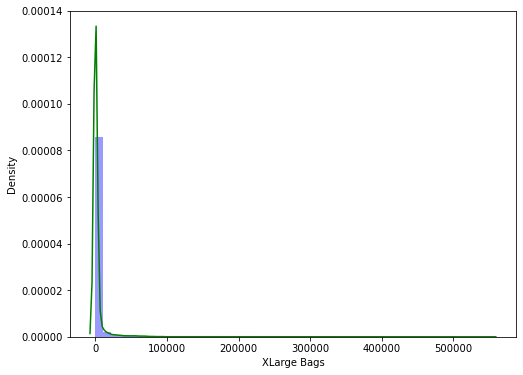

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(avacado['XLarge Bags'],color='b', kde_kws={"color": "g"})

print('Minimum',avacado['XLarge Bags'].min())
print('Maximum',avacado['XLarge Bags'].max())

Xlarge bags are densely populated in the range 0 to 5000, whereas they are spread till values more than 5 lakh, Data has high skewness to the right

## Bivariant Analysis

In [24]:
bi_avacado = avacado.copy()

#### First let's see the scatter plot of all the Numerical variables in term of AveragePrice

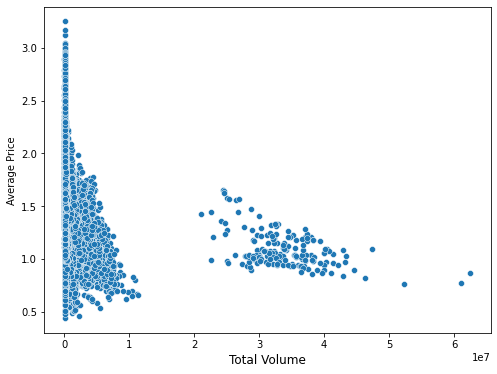

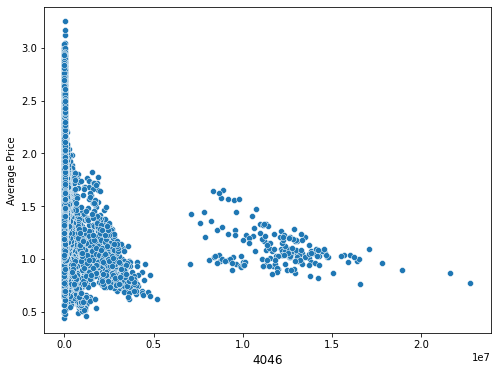

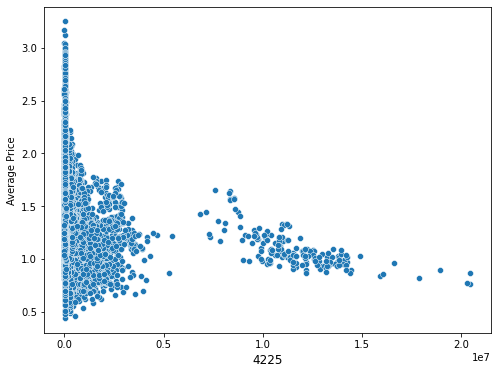

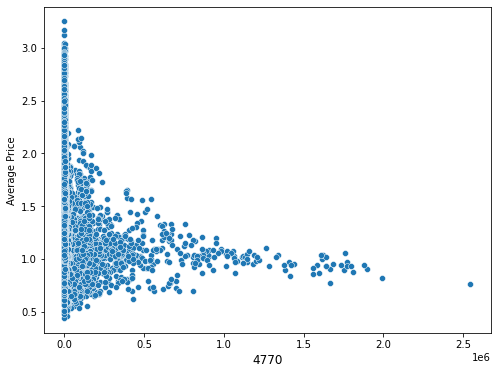

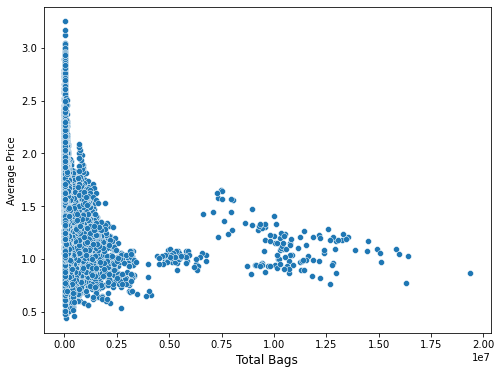

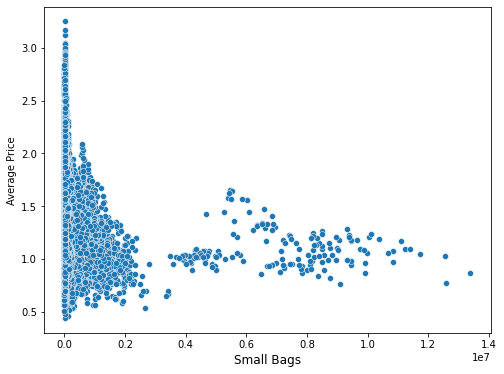

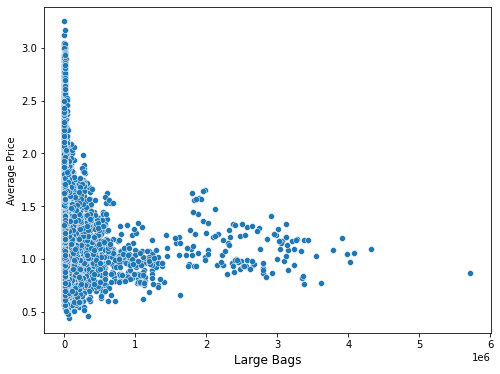

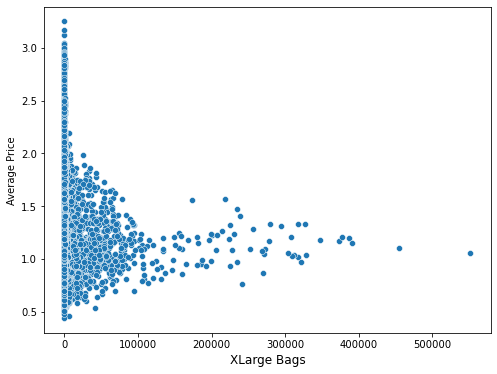

In [25]:
for i in avacado[continues]:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = avacado, x = i, y = avacado['AveragePrice']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Average Price")

Average price shows a negative correlation as the average price seem to decrease as total volumes, Product lookup code's and types of bags increases which means that average price decreases as the quantity of avacado's decreases.

#### let's see the scatter plot of all the Numerical variables in term of Total Volume

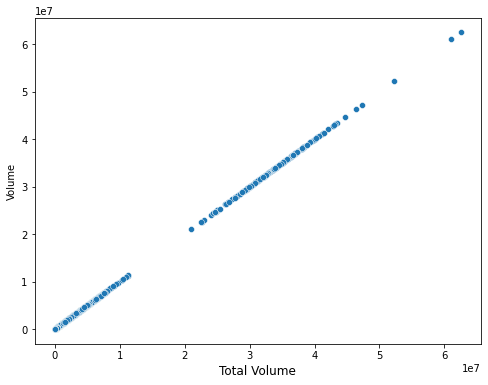

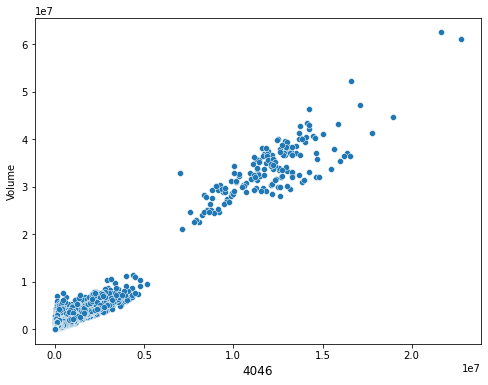

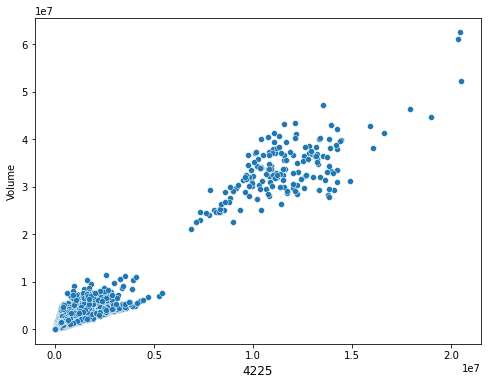

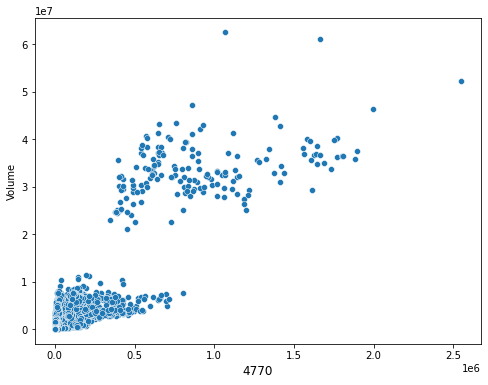

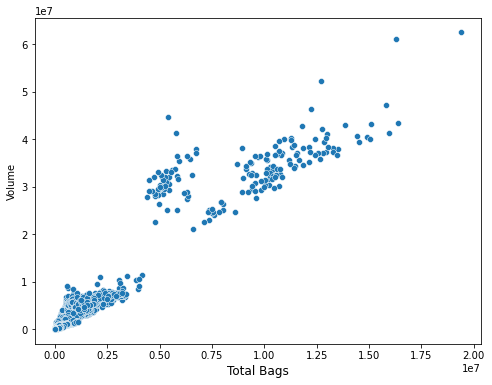

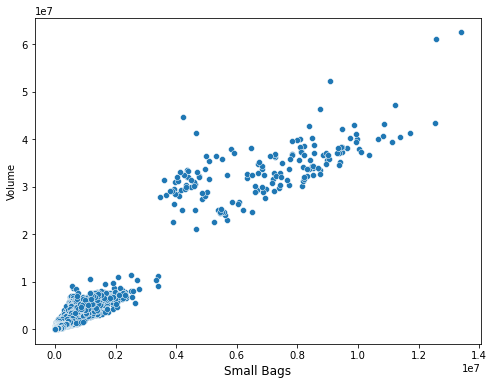

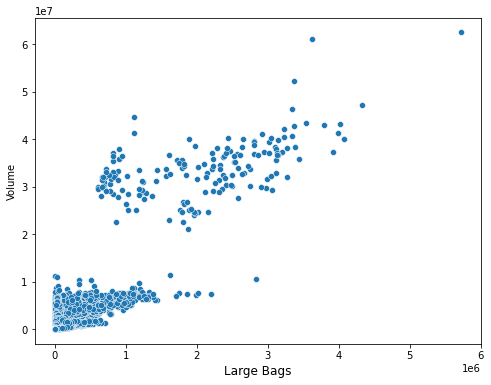

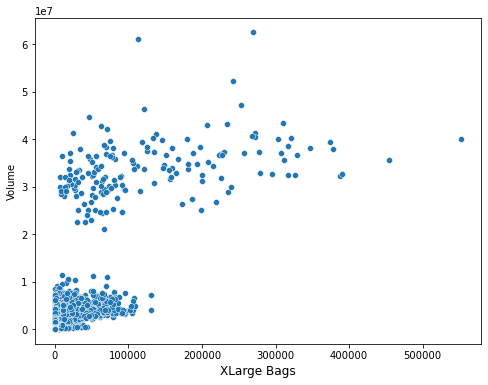

In [26]:
for i in avacado[continues]:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = avacado, x = i, y = avacado['Total Volume']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Volume")

With the increase in total volumes of avacado, quatity of all types of bags as well as Product lookup code's also increases. This is logical as if volume of avacado's increases, no. of bags needed to carry it and PLU's inreases.

### Plotting categorical attributes with reference to Average Price

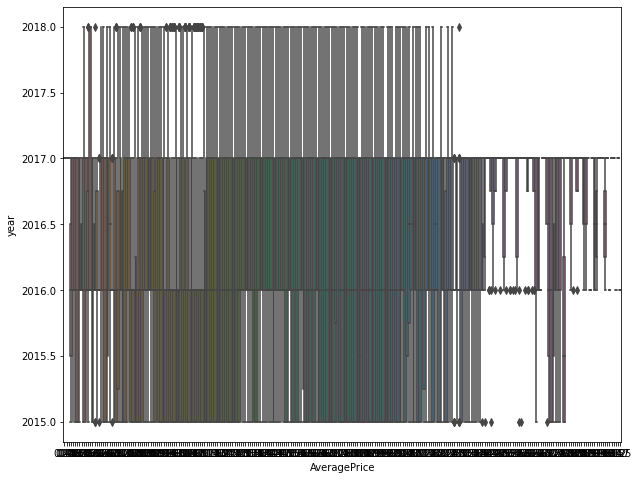

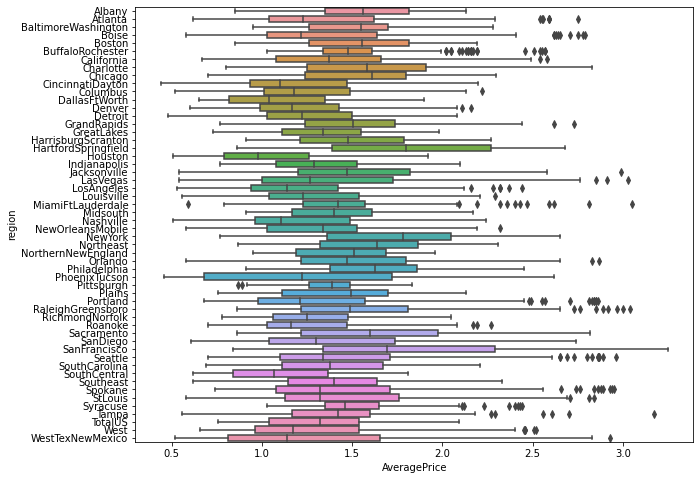

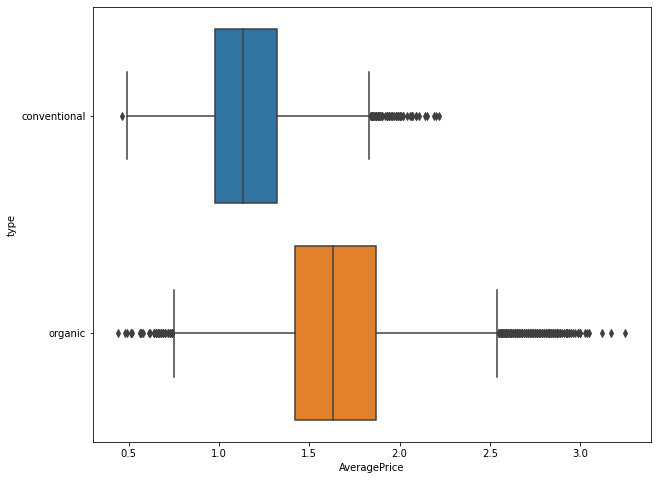

In [27]:
for i in avacado[catagorical]:
    plt.figure(figsize = (10,8))
    sns.boxplot( y = i, x = avacado['AveragePrice'],data = avacado);

1. Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception.

2. Highest average price for avacaodo's were in San diego, Las vegas and cahrlotte regions while the least was from phoenix tucson. It is also to be noted that highest average price belong from areas where there is more development.

3. Organic Avacoados are more expensive than the conventional ones.

### Plotting categorical attributes with reference to Year

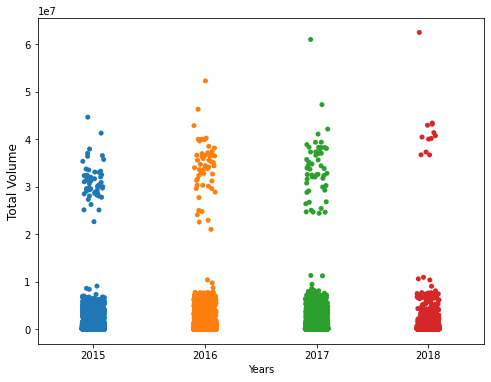

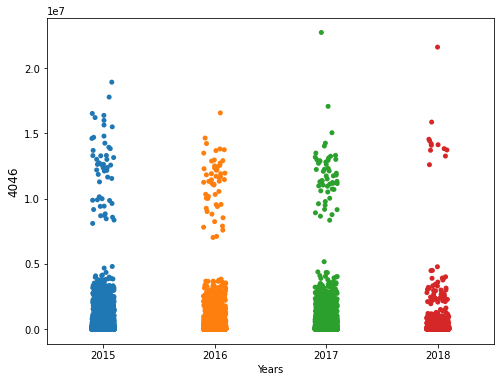

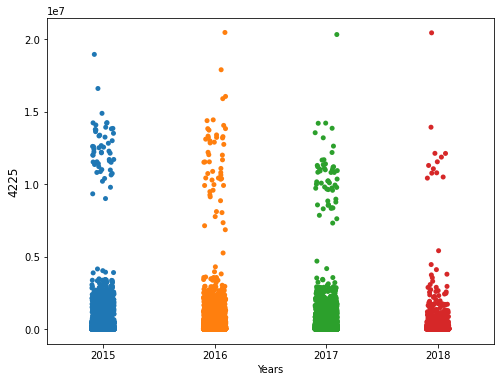

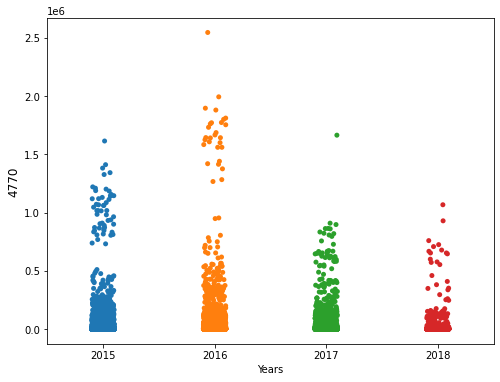

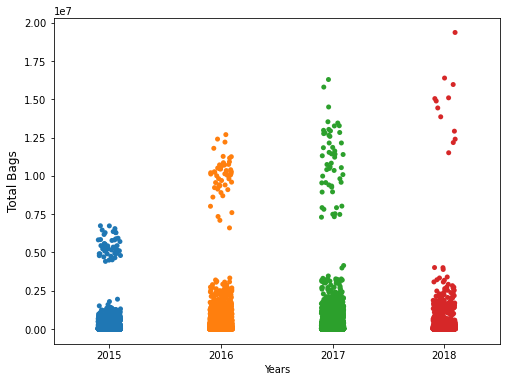

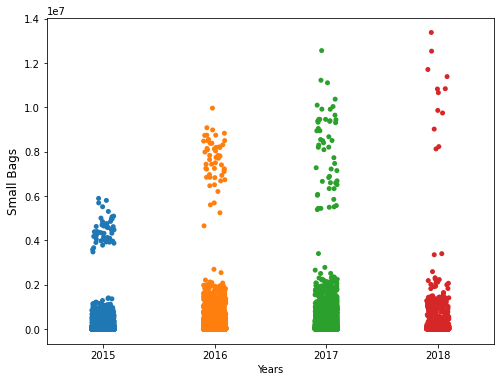

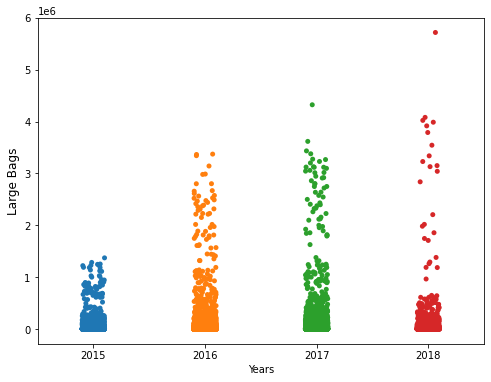

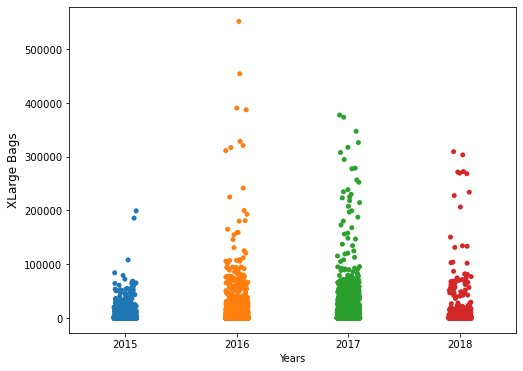

In [28]:
for i in avacado[continues]:
    plt.figure(figsize =(8,6))
    sns.stripplot(data = avacado, x = avacado['year'], y = i);
    plt.xlabel("Years")
    plt.ylabel(i, fontsize = 12)

Though data for the year 2018 is very low but we can see that total volume and PLUs are highest for 2018. As the time has passed volumes, bags to carry avocados have increased.

### Plotting categorical attributes with reference to type

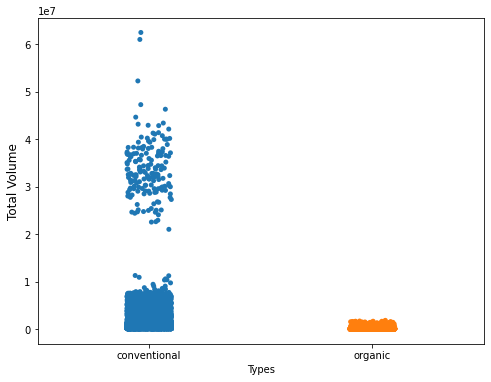

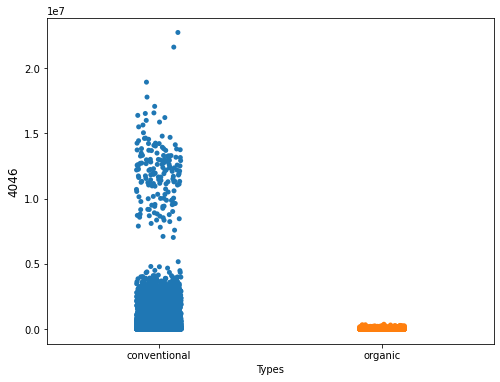

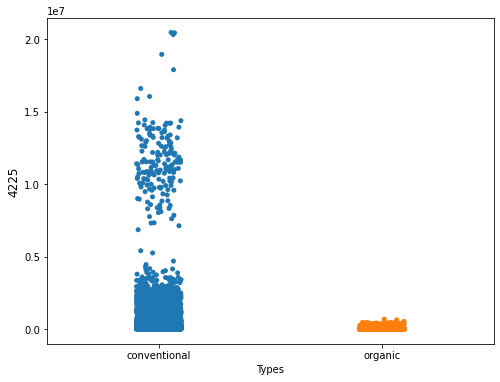

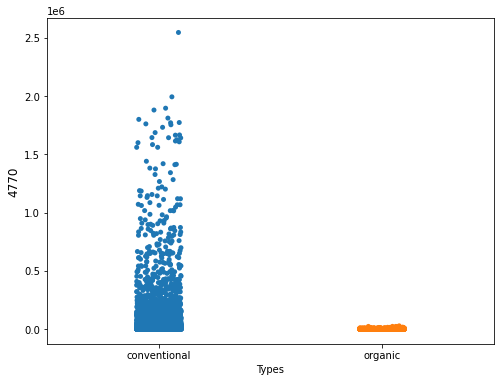

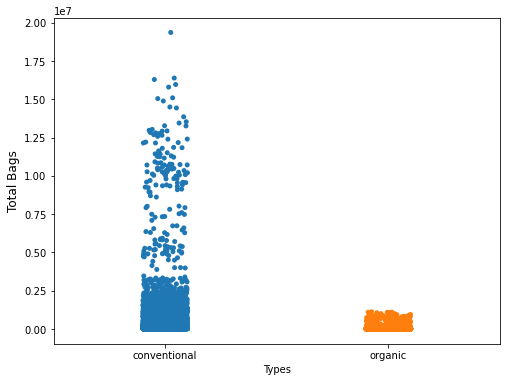

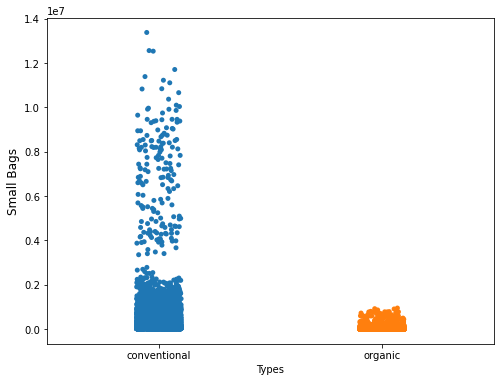

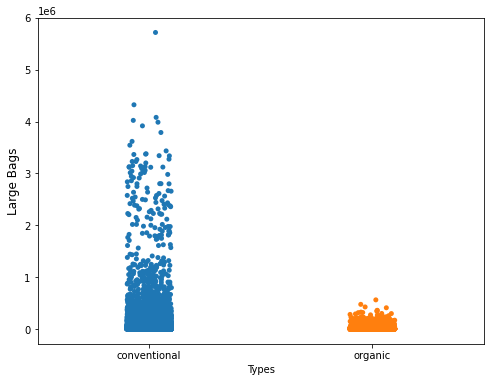

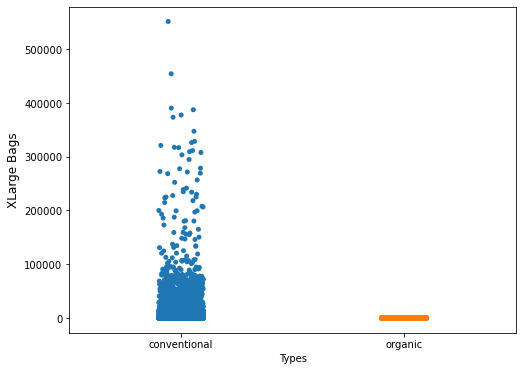

In [29]:
for i in avacado[continues]:
    plt.figure(figsize =(8,6))
    sns.stripplot(data = avacado, x = avacado['type'], y = i);
    plt.xlabel("Types")
    plt.ylabel(i, fontsize = 12)

Toal volumes. types of bags, and PLU's are all high for convetional type of avocados, this states that although price of organic type is high but cobventional types of avocados are more produced.

In [30]:
avacado.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


<AxesSubplot:>

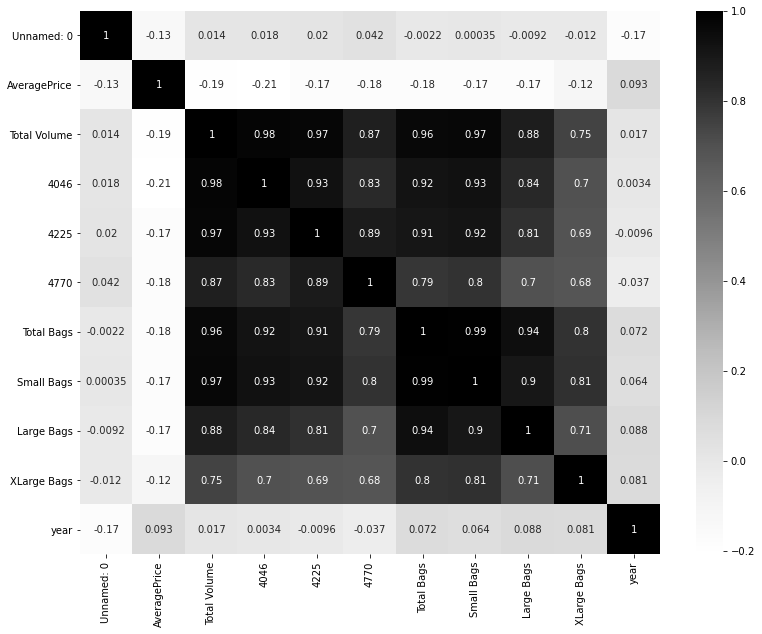

In [31]:
plt.figure(figsize=(13,10))
sns.heatmap(avacado.corr(),annot=True,cmap='Greys')

## Exploring Date Column 

In [32]:
#Converting date column into datetime format
avacado['Date']=pd.to_datetime(avacado['Date'])

In [33]:
#Extracting month, day and year info from date column.
avacado['Month']=avacado['Date'].apply(lambda x:x.month)
avacado['Day']=avacado['Date'].apply(lambda x:x.day)
avacado['Year']=avacado['Date'].apply(lambda x:x.year)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

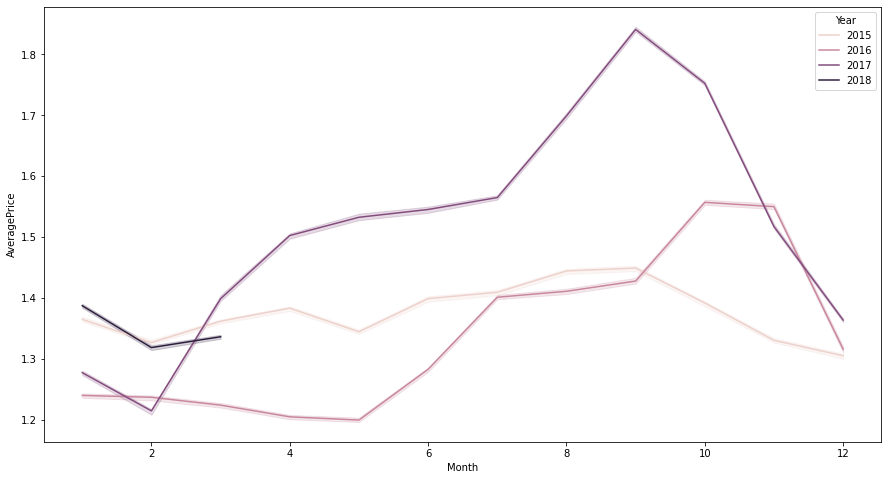

In [34]:
#plotting lineplot for AveragePrice with reference to Month.
plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='AveragePrice',hue='Year',ci=18,data=avacado)

Average price of avacado's is high in the month of September October November. As the season for avocado's is in the summer, off season fruit is expensive. We have data for year 2018 till march only

In [35]:
#We replace 2015 by 1 and 2016 by 2 for more simplicity
avacado['Year'].replace(2015,1,inplace=True)
avacado['Year'].replace(2016,2,inplace=True)
avacado['Year'].replace(2017,3,inplace=True)
avacado['Year'].replace(2018,4,inplace=True)

In [36]:
#we create a time column using year,month and day column and then drop these 3.
avacado['Time']=(avacado['Year']*365)+(avacado['Month']*30)+(avacado['Day'])
avacado.drop(['Year','Month','Day'],axis=1,inplace=True)

In [37]:
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Time
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,752
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,745
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,738
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,731
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,724


# Pre-processing

#### Removing unwanted coulmns 

In [38]:
avacado.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,724


#### Encoding for region and type

In [39]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [40]:
avacado['region']=label.fit_transform(avacado['region'].values.reshape(-1,1))
avacado['type']=label.fit_transform(avacado['type'].values.reshape(-1,1))

### Removing Outliers:

Z-Score Technique:

In [41]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(avacado))
z.shape

(18249, 13)

In [42]:
#We use threshold as 3

avacado_new = avacado[(z<3).all(axis=1)]
print(avacado.shape)
print(avacado_new.shape)

(18249, 13)
(17651, 13)


#### Percentage data loss after removing outliers:

In [43]:
loss_percent = (18249-17651)/18249*100
print(loss_percent)

3.276891884486821


### Removing Skewness

In [44]:
continues.append('Time') # adding time columns to continues feature of columns

In [45]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [46]:
#We make use of power transformer to remove skewness from all columns except from Total volume as it was incapable
for i in continues:
    if np.abs(avacado_new[i].skew())>0.5 and i!='Total Volume':
        avacado_new[i]=pt.fit_transform(avacado_new[i].values.reshape(-1,1))

# To remove skewness from total volume column we use log transformation
avacado_new['Total Volume']=np.log(avacado_new['Total Volume'])

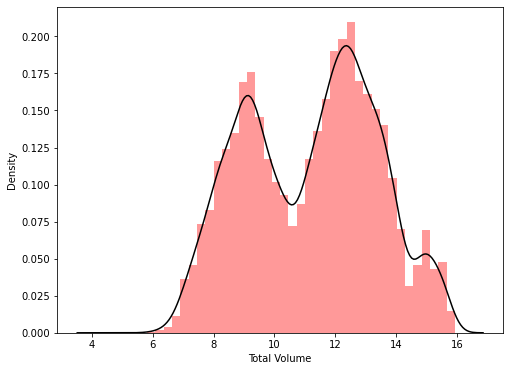

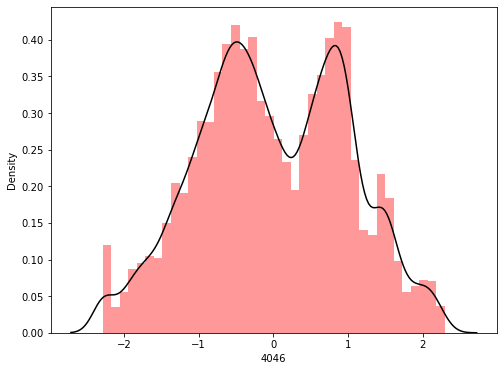

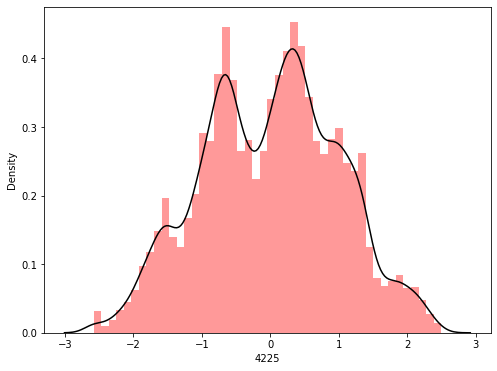

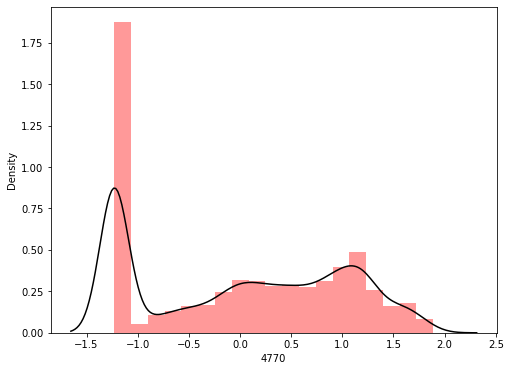

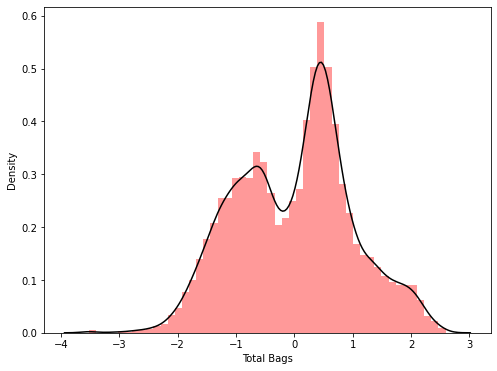

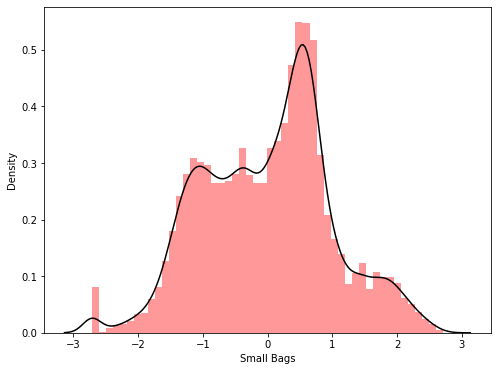

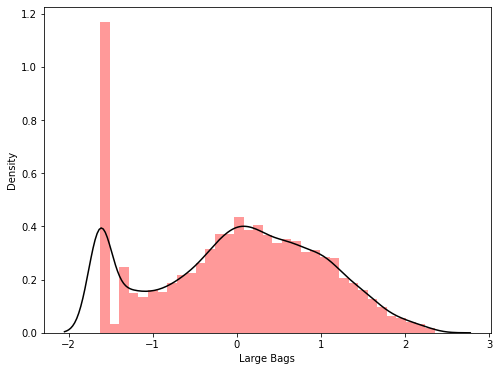

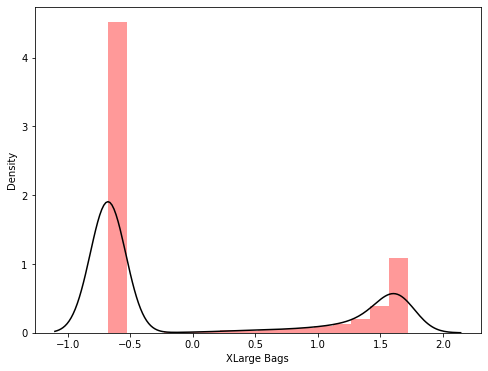

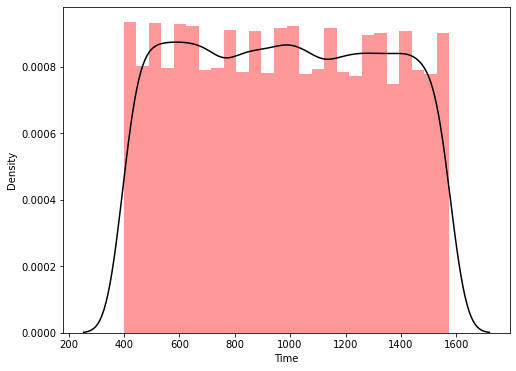

In [47]:
for i in avacado_new[continues].columns:
    plt.figure(figsize =(8,6))
    sns.distplot(avacado_new[i],color='r', kde_kws={"color": "k"})
    plt.xlabel(i)
    

Skewness is almost negligible after using tranformations techniques. Only Large and XLarge bags shows skewness in graph but it is still reduced considerably.

In [48]:
avacado_new.skew()

AveragePrice    0.377432
Total Volume   -0.050092
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
Time            0.016943
dtype: float64

### Separating the dependent and independent variables with angle of AveragePrice.

In [49]:
x=avacado_new.copy()
x.drop('AveragePrice',axis=1,inplace=True)

y=avacado_new['AveragePrice']

### Scaling the data

In [50]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() 

In [51]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Building Machine Learning Models

Importing Libraries

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score

#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [53]:
#importing metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [54]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [55]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [56]:
#Creating methord for the models and appending them to data frame

def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [57]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.1033,0.0218,0.1475,0.82,0.0843
SVR,0.1425,0.0357,0.1891,0.66,0.3642
LinearRegression,0.1969,0.0616,0.2483,0.28,0.1584
Lasso,0.3100,0.1437,0.3791,0.00,-1.1970
Ridge,0.1969,0.0616,0.2483,0.27,0.1587
ElasticNet,0.3100,0.1437,0.3791,0.00,-1.1970
DecisionTreeRegressor,0.1202,0.0333,0.1825,0.76,0.0643
RandomForestRegressor,0.0847,0.0146,0.1210,0.87,0.5233
AdaBoostRegressor,0.2018,0.0611,0.2472,0.20,0.1753


### Removing multicollinearity ussing L1 Regularisation

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,y)
print(m1.best_params_)

{'alpha': 1e-15}


In [60]:
m1=Lasso(alpha=1e-15)
m1.fit(x,y)

Lasso(alpha=1e-15)

In [61]:
importance = np.abs(m1.coef_)

In [62]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,Total Volume,1.457822
1,4046,0.071165
2,4225,1.309926
3,4770,0.099344
4,Total Bags,1.624450
5,Small Bags,1.124781
6,Large Bags,0.139422
7,XLarge Bags,0.005246
8,type,0.369990
9,year,0.464025


In [63]:
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
4,Total Bags,1.624450
0,Total Volume,1.457822
2,4225,1.309926
5,Small Bags,1.124781
11,Time,0.829115
9,year,0.464025
8,type,0.369990
6,Large Bags,0.139422
3,4770,0.099344
1,4046,0.071165


As removing features also leads to some data loss, so the model's performance will decreased, therefore we will not remove any features.

#### We apply Hperparameter tuning on Knearest Neighbor, Random Forest and xtreme Gradient Boost as they are giving the best performance for our dataset

### Hyperparameter Tuning

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

#### Knearest Neighbor

In [70]:
leaf = list(range(1,5))
k = list(range(1,5))
params={'n_neighbors':k,'leaf_size':leaf,'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

g=GridSearchCV(KNeighborsRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [71]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=3,
                    weights='distance')
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.8905574419777599


In [72]:
m=KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=3,weights='distance')
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [73]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0862
Mean Squared Error is 0.0158
Root Mean Squared Error is 0.1256
R2 Score is 87.83
Mean of cross validaton Score is 28.779


#### Random Forest

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500, 700]})

In [79]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=8, min_samples_split=3, n_estimators=300)
{'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 8}
0.7888322531432428


In [80]:
m=RandomForestRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=3,n_estimators=300)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [81]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.1313
Mean Squared Error is 0.0303
Root Mean Squared Error is 0.174
R2 Score is 69.34
Mean of cross validaton Score is 41.7251


#### Xtreme Gradient Boost

In [82]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...one,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          re

In [83]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=12,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}
0.9078919305652071


In [84]:
m=XGBRegressor(colsample_bytree=0.5,gamma=0.1,learning_rate=0.1,max_depth=12,min_child_weight=7)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [85]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0833
Mean Squared Error is 0.0127
Root Mean Squared Error is 0.1127
R2 Score is 89.12
Mean of cross validaton Score is 57.942


XGBRegressor is giving the best performance with minimum error compared to all the models, so we choose it as out final model.

## Finalizing the Model

In [86]:
model=XGBRegressor(colsample_bytree=0.5,gamma=0.1,learning_rate=0.1,max_depth=12,min_child_weight=7)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

### Evaluation Metrics

In [87]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0833
Mean Squared Error is 0.0127
Root Mean Squared Error is 0.1127
R2 Score is 89.12
Mean of cross validaton Score is 57.942


Text(0.5, 1.0, 'XGBRegressor')

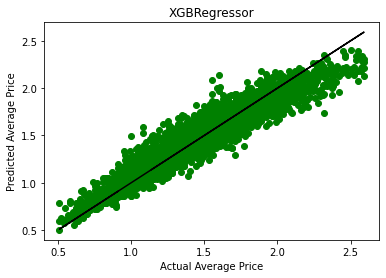

In [88]:
plt.scatter(x=ytest,y=p,color='g')
plt.plot(ytest,ytest,color='k')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')

# Saving the Model

In [89]:
import joblib
joblib.dump(model,'avacadoprice.obj')

['avacadoprice.obj']